## Table of Contents

1. [About the dataset](#section1)<br>
2. [Data loading and preprocessing](#section2)<br>
3. [Apriori Algorithm](#section3)<br>
4. [Conclusion](#section4)<br>

## About the Dataset

This dataset consists of data about 9835 transactions of a grocery store with 169 unique items. The aim is to know which set of items when placed closely may increase the sales. 
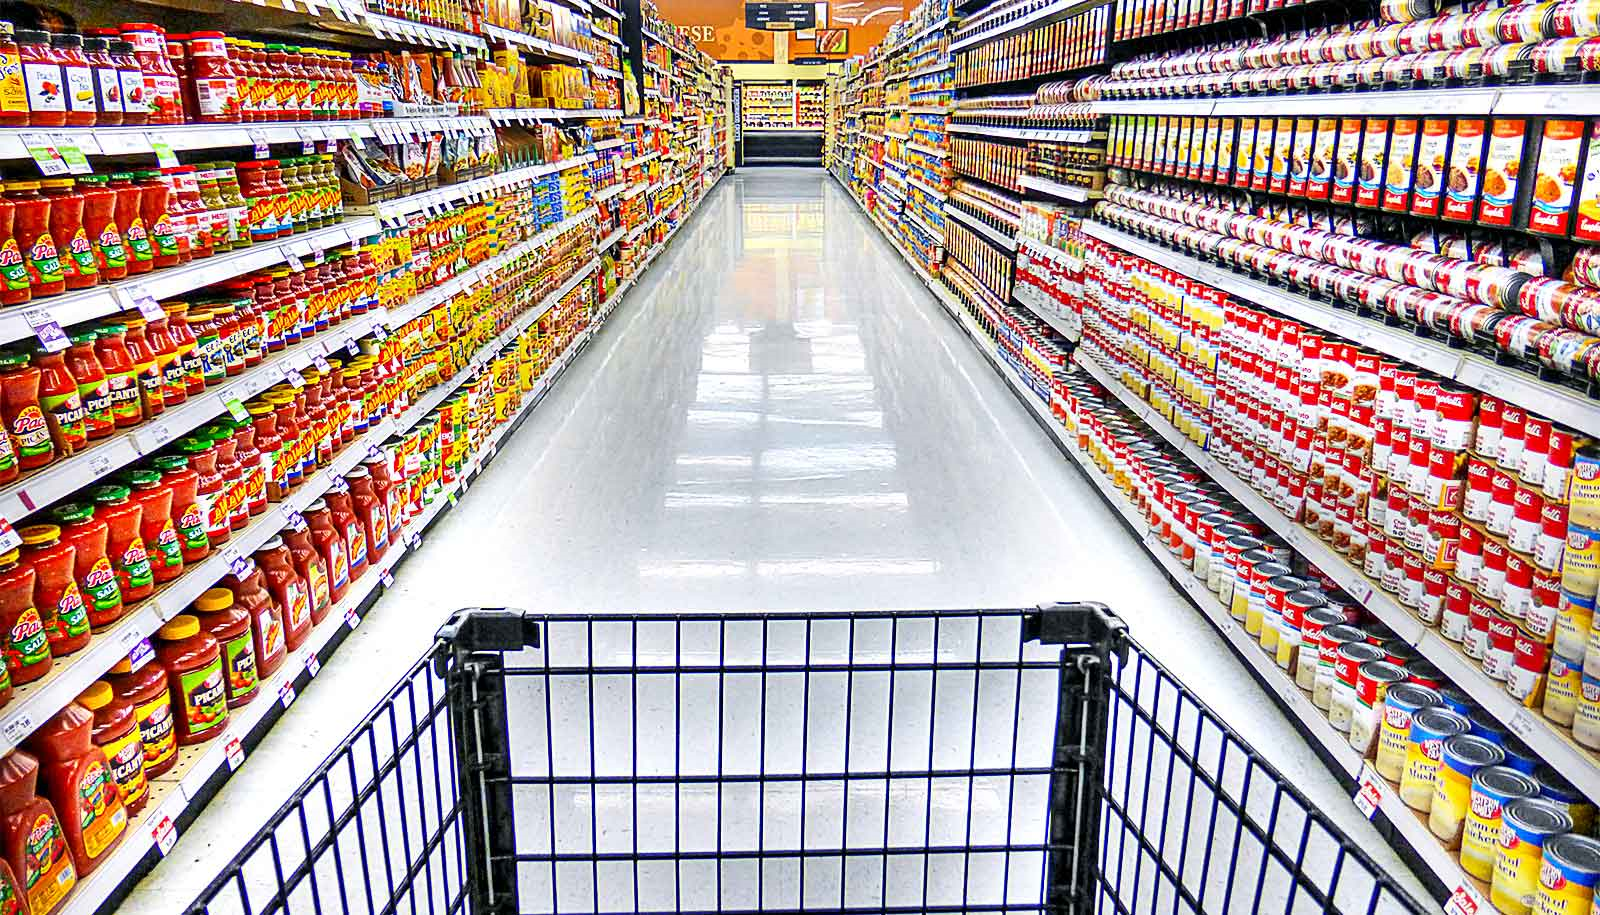

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

grocery = pd.read_csv('C:/Users/pc/Desktop/Datasciencestuff/264386_555058_bundle_archive/groceries - groceries.csv')


In [2]:
print(grocery.columns)

Index(['Item(s)', 'Item 1', 'Item 2', 'Item 3', 'Item 4', 'Item 5', 'Item 6',
       'Item 7', 'Item 8', 'Item 9', 'Item 10', 'Item 11', 'Item 12',
       'Item 13', 'Item 14', 'Item 15', 'Item 16', 'Item 17', 'Item 18',
       'Item 19', 'Item 20', 'Item 21', 'Item 22', 'Item 23', 'Item 24',
       'Item 25', 'Item 26', 'Item 27', 'Item 28', 'Item 29', 'Item 30',
       'Item 31', 'Item 32'],
      dtype='object')


In [3]:
grocery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9835 entries, 0 to 9834
Data columns (total 33 columns):
Item(s)    9835 non-null int64
Item 1     9835 non-null object
Item 2     7676 non-null object
Item 3     6033 non-null object
Item 4     4734 non-null object
Item 5     3729 non-null object
Item 6     2874 non-null object
Item 7     2229 non-null object
Item 8     1684 non-null object
Item 9     1246 non-null object
Item 10    896 non-null object
Item 11    650 non-null object
Item 12    468 non-null object
Item 13    351 non-null object
Item 14    273 non-null object
Item 15    196 non-null object
Item 16    141 non-null object
Item 17    95 non-null object
Item 18    66 non-null object
Item 19    52 non-null object
Item 20    38 non-null object
Item 21    29 non-null object
Item 22    18 non-null object
Item 23    14 non-null object
Item 24    8 non-null object
Item 25    7 non-null object
Item 26    7 non-null object
Item 27    6 non-null object
Item 28    5 non-null object
It

In [4]:
print(grocery)

      Item(s)                     Item 1                    Item 2  \
0           4               citrus fruit       semi-finished bread   
1           3             tropical fruit                    yogurt   
2           1                 whole milk                       NaN   
3           4                  pip fruit                    yogurt   
4           4           other vegetables                whole milk   
5           5                 whole milk                    butter   
6           1                 rolls/buns                       NaN   
7           5           other vegetables                  UHT-milk   
8           1              potted plants                       NaN   
9           2                 whole milk                   cereals   
10          5             tropical fruit          other vegetables   
11          9               citrus fruit            tropical fruit   
12          1                       beef                       NaN   
13          3       

In [5]:
grocery.reset_index(drop=True)

Item(s)                     Item 1                    Item 2  \
0           4               citrus fruit       semi-finished bread   
1           3             tropical fruit                    yogurt   
2           1                 whole milk                       NaN   
3           4                  pip fruit                    yogurt   
4           4           other vegetables                whole milk   
5           5                 whole milk                    butter   
6           1                 rolls/buns                       NaN   
7           5           other vegetables                  UHT-milk   
8           1              potted plants                       NaN   
9           2                 whole milk                   cereals   
10          5             tropical fruit          other vegetables   
11          9               citrus fruit            tropical fruit   
12          1                       beef                       NaN   
13          3                frankfurter                rolls/buns   
14          2                    chicken            tropical fruit   
15          4                     butter                     sugar   
16          1      fruit/vegetable juice                       NaN   
17          1  packaged fruit/vegetables                       NaN   
18          1                  chocolate                       NaN   
19          1              specialty bar                       NaN   
20          1           other vegetables                       NaN   
21          2                butter milk                    pastry   
22          1                 whole milk                       NaN   
23          5             tropical fruit              cream cheese   
24         11             tropical fruit           root vegetables   
25          2              bottled water               canned beer   
26          1                     yogurt                       NaN   
27          4                    sausage                rolls/buns   
28          1           other vegetables                       NaN   
29          6                brown bread                      soda   
...       ...                        ...                       ...   
9805        5                    dessert               white bread   
9806        3                 whole milk                      curd   
9807        1                  ice cream                       NaN   
9808        4              sliced cheese              frozen meals   
9809        6                       beef           root vegetables   
9810        4                       meat            hamburger meat   
9811        6               citrus fruit                   berries   
9812        7             tropical fruit                 pip fruit   
9813        4                    sausage                whole milk   
9814        4                 whole milk                    yogurt   
9815        1               frozen meals                       NaN   
9816        3                    sausage              citrus fruit   
9817       12                    sausage          other vegetables   
9818        1                 newspapers                       NaN   
9819        9                 whole milk                      curd   
9820       10                       beef              citrus fruit   
9821       12                  pip fruit                    grapes   
9822        2                     yogurt  long life bakery product   
9823        3                       pork         frozen vegetables   
9824        4                  ice cream  long life bakery product   
9825       10                    chicken            hamburger meat   
9826        6               citrus fruit                     herbs   
9827        9                frankfurter            tropical fruit   
9828        7                    sausage                    butter   
9829        7             tropical fruit          other vegetables   
9830       17   

In [7]:
grocery['trans'] = grocery.index

In [8]:
grocery

Item(s)                     Item 1                    Item 2  \
0           4               citrus fruit       semi-finished bread   
1           3             tropical fruit                    yogurt   
2           1                 whole milk                       NaN   
3           4                  pip fruit                    yogurt   
4           4           other vegetables                whole milk   
5           5                 whole milk                    butter   
6           1                 rolls/buns                       NaN   
7           5           other vegetables                  UHT-milk   
8           1              potted plants                       NaN   
9           2                 whole milk                   cereals   
10          5             tropical fruit          other vegetables   
11          9               citrus fruit            tropical fruit   
12          1                       beef                       NaN   
13          3                frankfurter                rolls/buns   
14          2                    chicken            tropical fruit   
15          4                     butter                     sugar   
16          1      fruit/vegetable juice                       NaN   
17          1  packaged fruit/vegetables                       NaN   
18          1                  chocolate                       NaN   
19          1              specialty bar                       NaN   
20          1           other vegetables                       NaN   
21          2                butter milk                    pastry   
22          1                 whole milk                       NaN   
23          5             tropical fruit              cream cheese   
24         11             tropical fruit           root vegetables   
25          2              bottled water               canned beer   
26          1                     yogurt                       NaN   
27          4                    sausage                rolls/buns   
28          1           other vegetables                       NaN   
29          6                brown bread                      soda   
...       ...                        ...                       ...   
9805        5                    dessert               white bread   
9806        3                 whole milk                      curd   
9807        1                  ice cream                       NaN   
9808        4              sliced cheese              frozen meals   
9809        6                       beef           root vegetables   
9810        4                       meat            hamburger meat   
9811        6               citrus fruit                   berries   
9812        7             tropical fruit                 pip fruit   
9813        4                    sausage                whole milk   
9814        4                 whole milk                    yogurt   
9815        1               frozen meals                       NaN   
9816        3                    sausage              citrus fruit   
9817       12                    sausage          other vegetables   
9818        1                 newspapers                       NaN   
9819        9                 whole milk                      curd   
9820       10                       beef              citrus fruit   
9821       12                  pip fruit                    grapes   
9822        2                     yogurt  long life bakery product   
9823        3                       pork         frozen vegetables   
9824        4                  ice cream  long life bakery product   
9825       10                    chicken            hamburger meat   
9826        6               citrus fruit                     herbs   
9827        9                frankfurter            tropical fruit   
9828        7                    sausage                    butter   
9829        7             tropical fruit          other vegetables   
9830       17   

In [9]:
print(grocery.columns)

Index(['Item(s)', 'Item 1', 'Item 2', 'Item 3', 'Item 4', 'Item 5', 'Item 6',
       'Item 7', 'Item 8', 'Item 9', 'Item 10', 'Item 11', 'Item 12',
       'Item 13', 'Item 14', 'Item 15', 'Item 16', 'Item 17', 'Item 18',
       'Item 19', 'Item 20', 'Item 21', 'Item 22', 'Item 23', 'Item 24',
       'Item 25', 'Item 26', 'Item 27', 'Item 28', 'Item 29', 'Item 30',
       'Item 31', 'Item 32', 'trans'],
      dtype='object')


## Let us start applying the Apriori algorithm

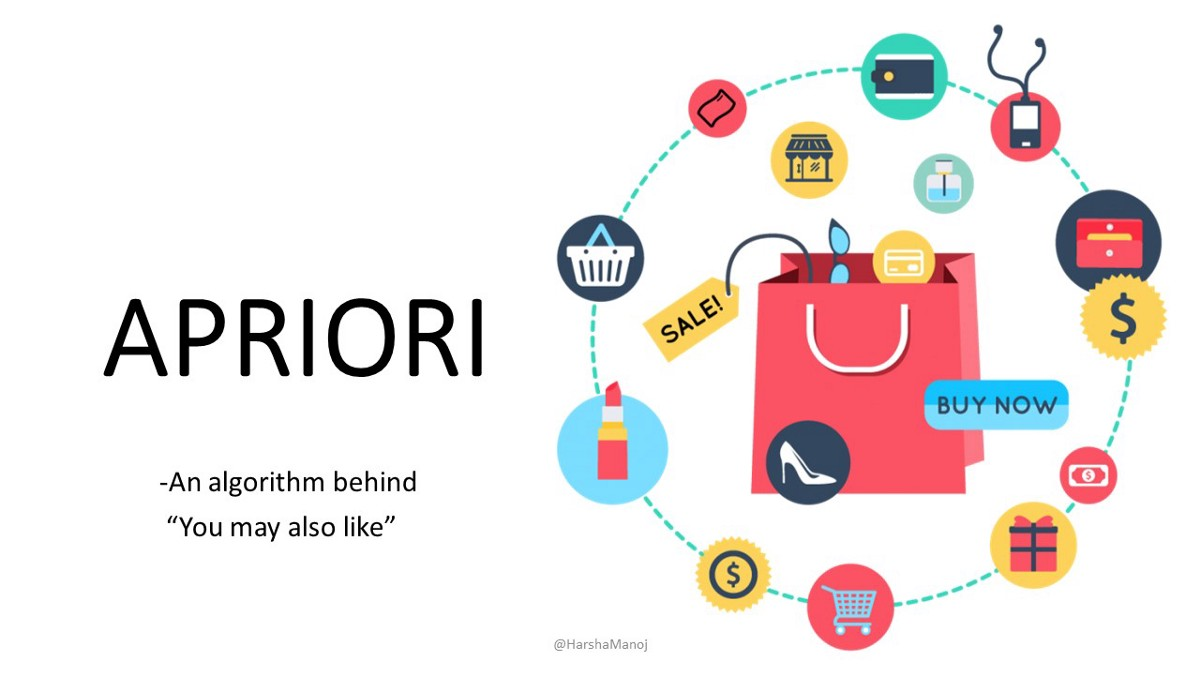

In [10]:
pip install mlxtend  


Note: you may need to restart the kernel to use updated packages.


In [11]:
import mlxtend
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

Creating a dataframe that will have a single line per item in a transaction.

In [12]:
for i in range(0, 9385):
    for j in range(1, grocery.values[i,0]+1):
        item_idx = j
        if i == 0 and j == 1:
            groceryy = pd.DataFrame({'Transaction': i, 'Item': grocery.iloc[i,j]},index = [i])
        else:
            groceryy = groceryy.append(pd.DataFrame({'Transaction': i, 'Item': grocery.iloc[i,j]},index = [i]))

        
        

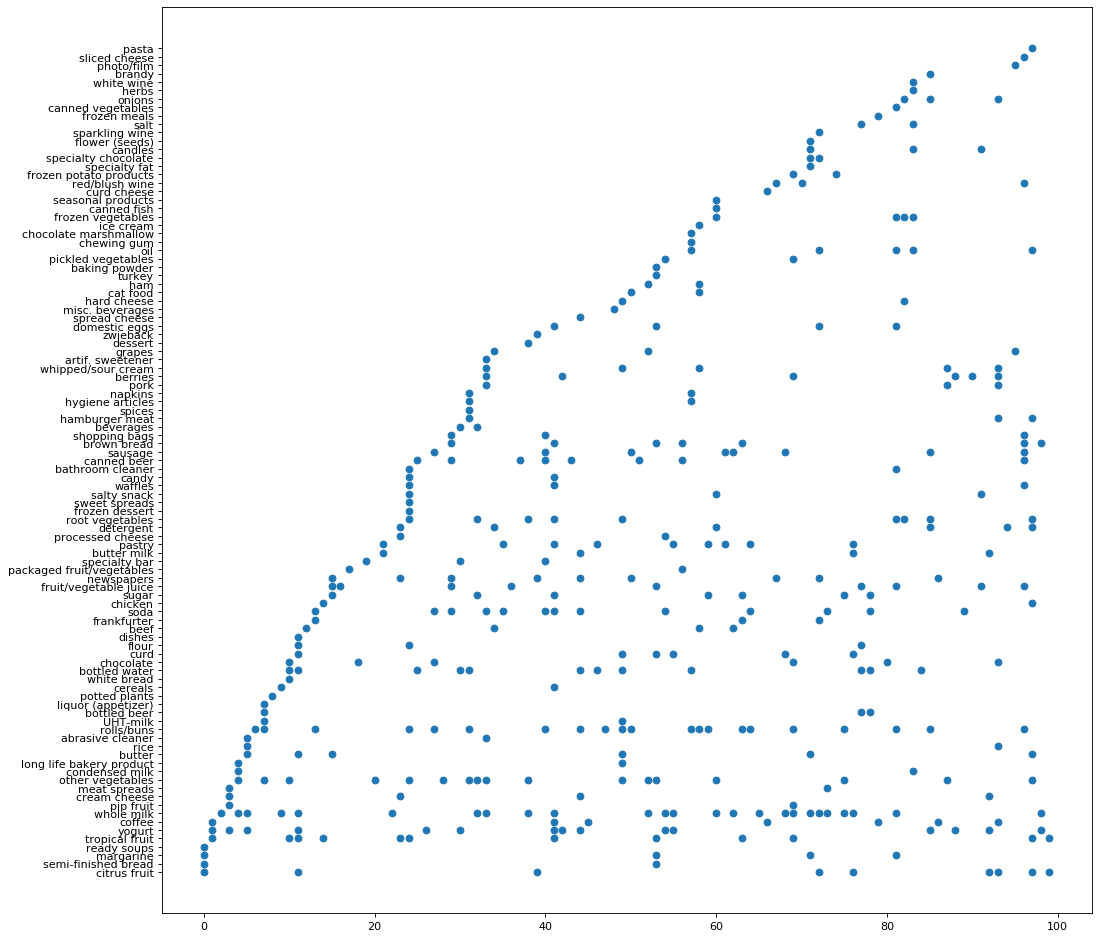

In [22]:
plt.figure(figsize=(15, 15), dpi=80)
plt.scatter(groceryy[groceryy['Transaction'] < 100]['Transaction'] ,groceryy[groceryy['Transaction'] < 100]['Item']) 



The above graph is a scatter plot of the first 100 transactions. Y axis represents the item names and the X axis represents the transaction.

In [12]:
groceryy

Transaction                      Item
0               0              citrus fruit
0               0       semi-finished bread
0               0                 margarine
0               0               ready soups
1               1            tropical fruit
1               1                    yogurt
1               1                    coffee
2               2                whole milk
3               3                 pip fruit
3               3                    yogurt
3               3              cream cheese
3               3              meat spreads
4               4          other vegetables
4               4                whole milk
4               4            condensed milk
4               4  long life bakery product
5               5                whole milk
5               5                    butter
5               5                    yogurt
5               5                      rice
5               5          abrasive cleaner
6               6                rolls/buns
7               7          other vegetables
7               7                  UHT-milk
7               7                rolls/buns
7               7              bottled beer
7               7        liquor (appetizer)
8               8             potted plants
9               9                whole milk
9               9                   cereals
...           ...                       ...
9375         9375              bottled beer
9376         9376                liver loaf
9376         9376                whole milk
9376         9376                      curd
9376         9376              frozen meals
9377         9377                   sausage
9377         9377               frozen fish
9377         9377       semi-finished bread
9377         9377               salty snack
9377         9377                   popcorn
9377         9377                   napkins
9378         9378               frankfurter
9378         9378                   sausage
9378         9378                whole milk
9378         9378                rolls/buns
9378         9378                       oil
9378         9378              cocoa drinks
9378         9378            kitchen towels
9379         9379        whipped/sour cream
9380         9380         frozen vegetables
9381         9381        whipped/sour cream
9382         9382               frankfurter
9382         9382               light bulbs
9383         9383                whole milk
9383         9383                    butter
9383         9383             domestic eggs
9383         9383             bottled water
9383         9383               salty snack
9384         9384                    yogurt
9384         9384         frozen vegetables

[41437 rows x 2 columns]

In [13]:
groceryy['Item'].value_counts()

whole milk                2389
other vegetables          1820
rolls/buns                1742
soda                      1646
yogurt                    1311
bottled water             1037
root vegetables           1026
tropical fruit             985
shopping bags              922
sausage                    878
pastry                     825
citrus fruit               779
bottled beer               761
newspapers                 755
canned beer                747
pip fruit                  709
whipped/sour cream         680
fruit/vegetable juice      672
brown bread                604
domestic eggs              603
frankfurter                557
margarine                  555
pork                       543
coffee                     537
butter                     521
beef                       500
curd                       497
napkins                    487
chocolate                  464
frozen vegetables          454
                          ... 
soap                        26
potato p

In [14]:
groceryy.shape

(41437, 2)

In [16]:
hot_encoded_grocery = groceryy.groupby(['Transaction','Item'])['Item'].count().unstack().reset_index().fillna(0).set_index('Transaction')
hot_encoded_grocery.head(20)

Item         Instant food products  UHT-milk  abrasive cleaner  \
Transaction                                                      
0                              0.0       0.0               0.0   
1                              0.0       0.0               0.0   
2                              0.0       0.0               0.0   
3                              0.0       0.0               0.0   
4                              0.0       0.0               0.0   
5                              0.0       0.0               1.0   
6                              0.0       0.0               0.0   
7                              0.0       1.0               0.0   
8                              0.0       0.0               0.0   
9                              0.0       0.0               0.0   
10                             0.0       0.0               0.0   
11                             0.0       0.0               0.0   
12                             0.0       0.0               0.0   
13                             0.0       0.0               0.0   
14                             0.0       0.0               0.0   
15                             0.0       0.0               0.0   
16                             0.0       0.0               0.0   
17                             0.0       0.0               0.0   
18                             0.0       0.0               0.0   
19                             0.0       0.0               0.0   

Item         artif. sweetener  baby cosmetics  baby food  bags  baking powder  \
Transaction                                                                     
0                         0.0             0.0        0.0   0.0            0.0   
1                         0.0             0.0        0.0   0.0            0.0   
2                         0.0             0.0        0.0   0.0            0.0   
3                         0.0             0.0        0.0   0.0            0.0   
4                         0.0             0.0        0.0   0.0            0.0   
5                         0.0             0.0        0.0   0.0            0.0   
6                         0.0             0.0        0.0   0.0            0.0   
7                         0.0             0.0        0.0   0.0            0.0   
8                         0.0             0.0        0.0   0.0            0.0   
9                         0.0             0.0        0.0   0.0            0.0   
10                        0.0             0.0        0.0   0.0            0.0   
11                        0.0             0.0        0.0   0.0            0.0   
12                        0.0             0.0        0.0   0.0            0.0   
13                        0.0             0.0        0.0   0.0            0.0   
14                        0.0             0.0        0.0   0.0            0.0   
15                        0.0             0.0        0.0   0.0            0.0   
16                        0.0             0.0        0.0   0.0            0.0   
17                        0.0             0.0        0.0   0.0            0.0   
18                        0.0             0.0        0.0   0.0            0.0   
19                        0.0             0.0        0.0   0.0            0.0   

Item         bathroom cleaner  beef  ...  turkey  vinegar  waffles  \
Transaction                          ...                             
0                         0.0   0.0  ...     0.0      0.0      0.0   
1                         0.0   0.0  ...     0.0      0.0      0.0   
2                         0.0   0.0  ...     0.0      0.0      0.0   
3                         0.0   0.0  ...     0.0      0.0      0.0   
4                         0.0   0.0  ...     0.0      0.0      0.0   
5                         0.0   0.0  ...     0.0      0.0      0.0   
6                         0.0   0.0  ...     0.0      0.0      0.0   
7                         0.0   0.0  ...     0.0      0.0      0.0   
8                         0.0   0.0  ...     0.0      0.0      0

In [35]:
groceryy['Item'].value_counts()

whole milk                2389
other vegetables          1820
rolls/buns                1742
soda                      1646
yogurt                    1311
bottled water             1037
root vegetables           1026
tropical fruit             985
shopping bags              922
sausage                    878
pastry                     825
citrus fruit               779
bottled beer               761
newspapers                 755
canned beer                747
pip fruit                  709
whipped/sour cream         680
fruit/vegetable juice      672
brown bread                604
domestic eggs              603
frankfurter                557
margarine                  555
pork                       543
coffee                     537
butter                     521
beef                       500
curd                       497
napkins                    487
chocolate                  464
frozen vegetables          454
                          ... 
soap                        26
potato p

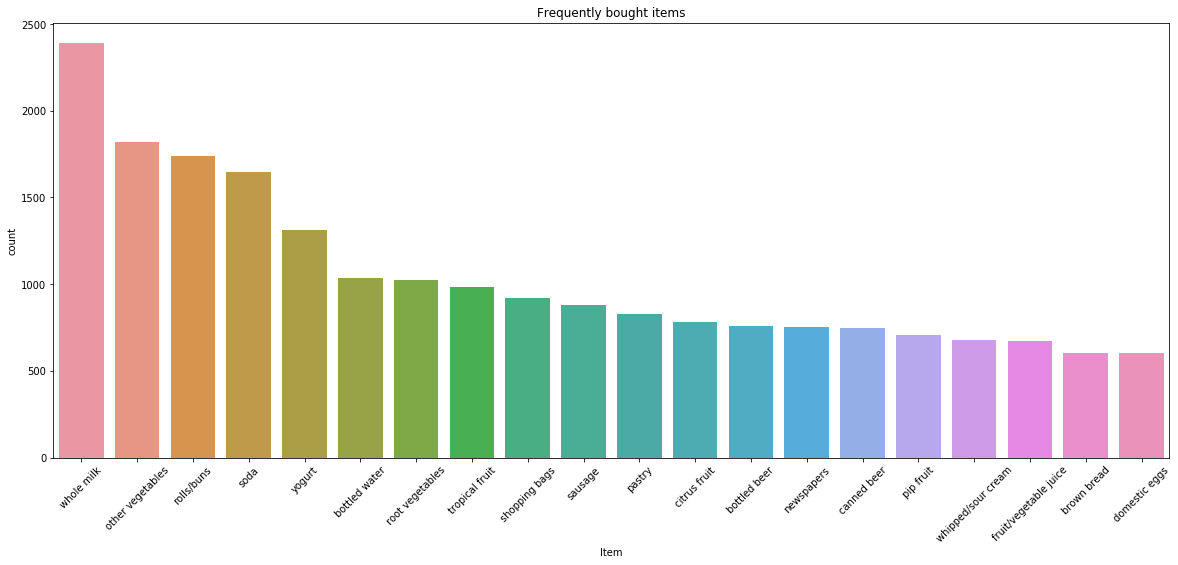

In [13]:
fig  =  plt.figure(figsize = (20,8))
plt.rc('xtick', labelsize=10)
plt.title('Frequently bought items')
plt.xticks(rotation=45)


sns.countplot(x="Item", data=groceryy, order  =  groceryy['Item'].value_counts().head(20).index)

1. Whole milk is the most frequently bought item. It is bought in about 2400 transactions.
2. Other vegetables, rolls/buns, soda and yogurt come next. They are bought in about 1300 transactions.

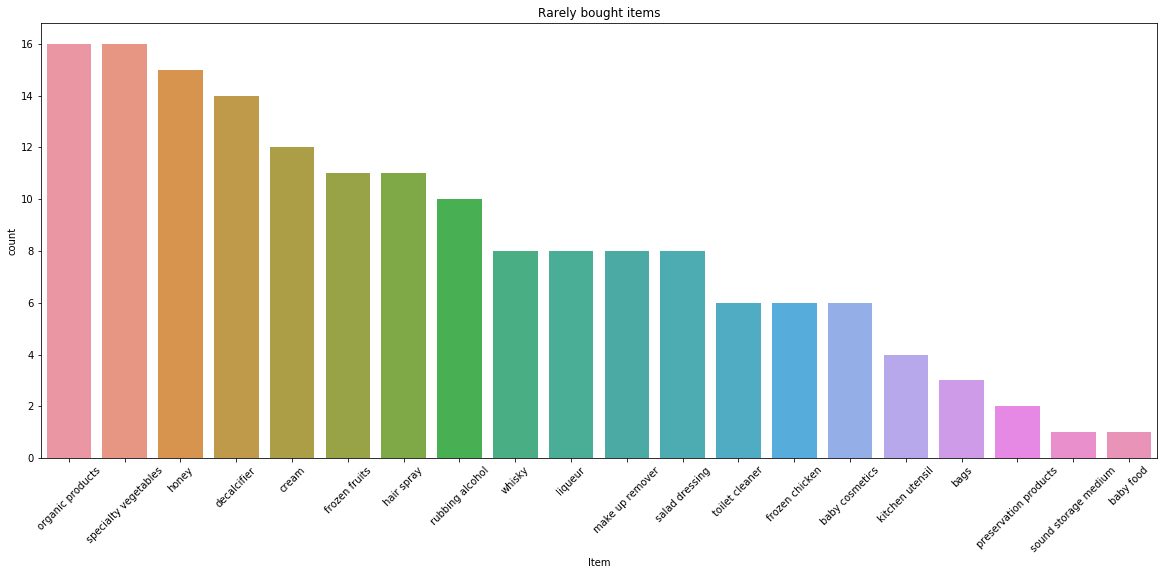

In [14]:
fig  =  plt.figure(figsize = (20,8))
plt.rc('xtick', labelsize=10)
plt.title('Rarely bought items')
plt.xticks(rotation=45)


sns.countplot(x="Item", data=groceryy, order  =  groceryy['Item'].value_counts().tail(20).index)

In [17]:
def encode_units(x):
    if x <=  0:
        return 0
    if x >=  1:
        return 1
hot_encoded_grocery  =  hot_encoded_grocery.applymap(encode_units)

In [18]:
frequent_itemsets  =  apriori(hot_encoded_grocery, min_support = 0.01, use_colnames = True)

In [19]:
rules  =  association_rules(frequent_itemsets, metric = "lift", min_threshold = 1)
rules.head(10)

antecedents         consequents  antecedent support  \
0              (beef)  (other vegetables)            0.053277   
1  (other vegetables)              (beef)            0.193926   
2              (beef)        (rolls/buns)            0.053277   
3        (rolls/buns)              (beef)            0.185615   
4   (root vegetables)              (beef)            0.109323   
5              (beef)   (root vegetables)            0.053277   
6        (whole milk)              (beef)            0.254555   
7              (beef)        (whole milk)            0.053277   
8            (yogurt)              (beef)            0.139691   
9              (beef)            (yogurt)            0.053277   

   consequent support   support  confidence      lift  leverage  conviction  
0            0.193926  0.020032    0.376000  1.938879  0.009700    1.291784  
1            0.053277  0.020032    0.103297  1.938879  0.009700    1.055782  
2            0.185615  0.013958    0.262000  1.411521  0.004070    1.103502  
3            0.053277  0.013958    0.075201  1.411521  0.004070    1.023707  
4            0.053277  0.017794    0.162768  3.055156  0.011970    1.130778  
5            0.109323  0.017794    0.334000  3.055156  0.011970    1.337352  
6            0.053277  0.021204    0.083298  1.563512  0.007642    1.032750  
7            0.254555  0.021204    0.398000  1.563512  0.007642    1.238280  
8            0.053277  0.011827    0.084668  1.589222  0.004385    1.034295  
9            0.139691  0.011827    0.222000  1.589222  0.004385    1.105796

In [20]:
rules.sort_values('confidence', ascending  =  False, inplace  =  True)
rules.head(20)

antecedents         consequents  \
428            (citrus fruit, root vegetables)  (other vegetables)   
506          (root vegetables, tropical fruit)  (other vegetables)   
423                 (butter, other vegetables)        (whole milk)   
448                             (yogurt, curd)        (whole milk)   
453          (domestic eggs, other vegetables)        (whole milk)   
586          (root vegetables, tropical fruit)        (whole milk)   
592                  (root vegetables, yogurt)        (whole milk)   
472              (other vegetables, pip fruit)        (whole milk)   
609               (whipped/sour cream, yogurt)        (whole milk)   
604                   (tropical fruit, yogurt)        (whole milk)   
568              (root vegetables, rolls/buns)        (whole milk)   
562                 (yogurt, other vegetables)        (whole milk)   
483              (root vegetables, rolls/buns)  (other vegetables)   
518                  (root vegetables, yogurt)  (other vegetables)   
549     (whipped/sour cream, other vegetables)        (whole milk)   
80                                    (butter)        (whole milk)   
554               (whipped/sour cream, yogurt)  (other vegetables)   
514        (root vegetables, other vegetables)        (whole milk)   
460  (other vegetables, fruit/vegetable juice)        (whole milk)   
153                                     (curd)        (whole milk)   

     antecedent support  consequent support   support  confidence      lift  \
428            0.017794            0.193926  0.010549    0.592814  3.056903   
506            0.021630            0.193926  0.012680    0.586207  3.022831   
423            0.020139            0.254555  0.011721    0.582011  2.286383   
448            0.017475            0.254555  0.010123    0.579268  2.275610   
453            0.022163            0.254555  0.012786    0.576923  2.266397   
586            0.021630            0.254555  0.012467    0.576355  2.264164   
592            0.026532            0.254555  0.015024    0.566265  2.224528   
472            0.025892            0.254555  0.013745    0.530864  2.085459   
609            0.020884            0.254555  0.011082    0.530612  2.084469   
604            0.029622            0.254555  0.015663    0.528777  2.077259   
568            0.024401            0.254555  0.012786    0.524017  2.058562   
562            0.044006            0.254555  0.022696    0.515738  2.026038   
483            0.024401            0.193926  0.012254    0.502183  2.589556   
518            0.026532            0.193926  0.013319    0.502008  2.588651   
549            0.029302            0.254555  0.014704    0.501818  1.971354   
80             0.055514            0.254555  0.027810    0.500960  1.967981   
554            0.020884            0.193926  0.010336    0.494898  2.551988   
514            0.047949            0.254555  0.023655    0.493333  1.938021   
460            0.021097            0.254555  0.010336    0.489899  1.924530   
153            0.052957            0.254555  0.025786    0.486922  1.912833   

     leverage  conviction  
428  0.007098    1.979622  
506  0.008485    1.948011  
423  0.006594    1.783406  
448  0.005674    1.771782  
453  0.007145    1.761961  
586  0.006961    1.759597  
592  0.008270    1.718665  
472  0.007154    1.588975  
609  0.005765    1.588122  
604  0.008123    1.581936  
568  0.006575    1.566118  
562  0.011494    1.539344  
483  0.007522    1.619218  
518  0.008174    1.618648  
549  0.007245    1.496331  
80   0.013679    1.493757  
554  0.006286    1.595863  
514  0.011449    1.471273  
460  0.004965    1.461367  
153  0.012305    1.452887

In [21]:
rules = rules[rules['confidence']>= 0.5]
rules

antecedents         consequents  \
428         (citrus fruit, root vegetables)  (other vegetables)   
506       (root vegetables, tropical fruit)  (other vegetables)   
423              (butter, other vegetables)        (whole milk)   
448                          (yogurt, curd)        (whole milk)   
453       (domestic eggs, other vegetables)        (whole milk)   
586       (root vegetables, tropical fruit)        (whole milk)   
592               (root vegetables, yogurt)        (whole milk)   
472           (other vegetables, pip fruit)        (whole milk)   
609            (whipped/sour cream, yogurt)        (whole milk)   
604                (tropical fruit, yogurt)        (whole milk)   
568           (root vegetables, rolls/buns)        (whole milk)   
562              (yogurt, other vegetables)        (whole milk)   
483           (root vegetables, rolls/buns)  (other vegetables)   
518               (root vegetables, yogurt)  (other vegetables)   
549  (whipped/sour cream, other vegetables)        (whole milk)   
80                                 (butter)        (whole milk)   

     antecedent support  consequent support   support  confidence      lift  \
428            0.017794            0.193926  0.010549    0.592814  3.056903   
506            0.021630            0.193926  0.012680    0.586207  3.022831   
423            0.020139            0.254555  0.011721    0.582011  2.286383   
448            0.017475            0.254555  0.010123    0.579268  2.275610   
453            0.022163            0.254555  0.012786    0.576923  2.266397   
586            0.021630            0.254555  0.012467    0.576355  2.264164   
592            0.026532            0.254555  0.015024    0.566265  2.224528   
472            0.025892            0.254555  0.013745    0.530864  2.085459   
609            0.020884            0.254555  0.011082    0.530612  2.084469   
604            0.029622            0.254555  0.015663    0.528777  2.077259   
568            0.024401            0.254555  0.012786    0.524017  2.058562   
562            0.044006            0.254555  0.022696    0.515738  2.026038   
483            0.024401            0.193926  0.012254    0.502183  2.589556   
518            0.026532            0.193926  0.013319    0.502008  2.588651   
549            0.029302            0.254555  0.014704    0.501818  1.971354   
80             0.055514            0.254555  0.027810    0.500960  1.967981   

     leverage  conviction  
428  0.007098    1.979622  
506  0.008485    1.948011  
423  0.006594    1.783406  
448  0.005674    1.771782  
453  0.007145    1.761961  
586  0.006961    1.759597  
592  0.008270    1.718665  
472  0.007154    1.588975  
609  0.005765    1.588122  
604  0.008123    1.581936  
568  0.006575    1.566118  
562  0.011494    1.539344  
483  0.007522    1.619218  
518  0.008174    1.618648  
549  0.007245    1.496331  
80   0.013679    1.493757

In [22]:
rules

antecedents         consequents  \
428         (citrus fruit, root vegetables)  (other vegetables)   
506       (root vegetables, tropical fruit)  (other vegetables)   
423              (butter, other vegetables)        (whole milk)   
448                          (yogurt, curd)        (whole milk)   
453       (domestic eggs, other vegetables)        (whole milk)   
586       (root vegetables, tropical fruit)        (whole milk)   
592               (root vegetables, yogurt)        (whole milk)   
472           (other vegetables, pip fruit)        (whole milk)   
609            (whipped/sour cream, yogurt)        (whole milk)   
604                (tropical fruit, yogurt)        (whole milk)   
568           (root vegetables, rolls/buns)        (whole milk)   
562              (yogurt, other vegetables)        (whole milk)   
483           (root vegetables, rolls/buns)  (other vegetables)   
518               (root vegetables, yogurt)  (other vegetables)   
549  (whipped/sour cream, other vegetables)        (whole milk)   
80                                 (butter)        (whole milk)   

     antecedent support  consequent support   support  confidence      lift  \
428            0.017794            0.193926  0.010549    0.592814  3.056903   
506            0.021630            0.193926  0.012680    0.586207  3.022831   
423            0.020139            0.254555  0.011721    0.582011  2.286383   
448            0.017475            0.254555  0.010123    0.579268  2.275610   
453            0.022163            0.254555  0.012786    0.576923  2.266397   
586            0.021630            0.254555  0.012467    0.576355  2.264164   
592            0.026532            0.254555  0.015024    0.566265  2.224528   
472            0.025892            0.254555  0.013745    0.530864  2.085459   
609            0.020884            0.254555  0.011082    0.530612  2.084469   
604            0.029622            0.254555  0.015663    0.528777  2.077259   
568            0.024401            0.254555  0.012786    0.524017  2.058562   
562            0.044006            0.254555  0.022696    0.515738  2.026038   
483            0.024401            0.193926  0.012254    0.502183  2.589556   
518            0.026532            0.193926  0.013319    0.502008  2.588651   
549            0.029302            0.254555  0.014704    0.501818  1.971354   
80             0.055514            0.254555  0.027810    0.500960  1.967981   

     leverage  conviction  
428  0.007098    1.979622  
506  0.008485    1.948011  
423  0.006594    1.783406  
448  0.005674    1.771782  
453  0.007145    1.761961  
586  0.006961    1.759597  
592  0.008270    1.718665  
472  0.007154    1.588975  
609  0.005765    1.588122  
604  0.008123    1.581936  
568  0.006575    1.566118  
562  0.011494    1.539344  
483  0.007522    1.619218  
518  0.008174    1.618648  
549  0.007245    1.496331  
80   0.013679    1.493757

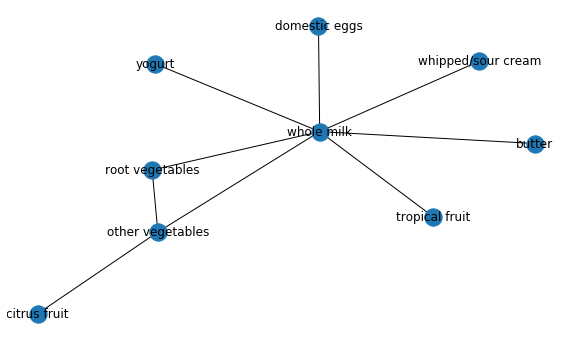

In [23]:
import matplotlib.pyplot as plt

import networkx as nx
rules.antecedents  =  rules.antecedents.apply(lambda x: next(iter(x)))
rules.consequents  =  rules.consequents.apply(lambda x: next(iter(x)))
fig, ax = plt.subplots(figsize = (10,6))
GA = nx.from_pandas_edgelist(rules,source = 'antecedents',target = 'consequents')
nx.draw(GA,with_labels = True)

## Conclusion

1. Other items are bought as a consequent when root vegetables, citrus fruit, tropical fruit are bought. It is about more than 30%.
2. Whole milk is bought when eatables curd/yogurt, eggs, rolls/buns are bought.
3. So, it makes sense to arrange all eatables root vegetables, other vegetables, fruits, eggs, bread etc together so that the customer would buy maximum no of items thereby increasing sales.
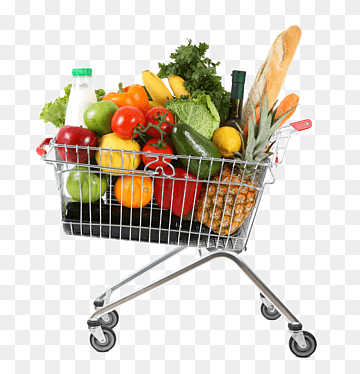